A dataset of 10K credit card holders or clients and 23 features will be used to predict credit card churn

# Objective

The objective of this project is to examine a credit card holders dataset to predict churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import featuretools as ft
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
import scikitplot as skplt


Bad key "text.kerning_factor" on line 4 in
/Users/aminsafarini/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('BankChurners.csv')

# Exploratory Data Exploration (EDA)

In [3]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Column Description:

- <b>Clientnum:</b> unique ID for each credit card holder (client)
- <b>Attrition_Flag:</b> This will be the lablel. Shows Existing customer vs Attrited customer
- <b>Customer_Age:</b> Age
- <b>Gender:</b> M/F
- <b>Dependent_count:</b> Number of dependents in household 
- <b>Education_Level:</b> 7 categories (uneducated, high school, college, graduate, post-graduate, doctorate, unknown)
- <b>Marital_Status:</b> 4 categories, single, married, divorced or unknown
- <b>Income_Category:</b> 6 income categories (<40K,  40K - 60K,  60K - 80K,  80K - 120K,  120K+ and Unknown) 
- <b>Card_Category:</b> 4 card categories (Bue, Silver, Gold and Platinum)
- <b>Months_on_book:</b> period of relationship with bank
- <b>Total_Relationship_Count:</b> total number of productes held by customer
- <b>Months_Inactive_12_mon:</b> # of months inactie in the last 12 months
- <b>Contacts_Count_12_mon:</b> # of contacts in the last 12 months
- <b>Credit_Limit:</b> credit limit on the card
- <b>Total_Revolving_Bal:</b> total revolving balance on the card
- <b>Avg_Open_To_Buy:</b> open to buy credit line (avg. of last 12 months)
- <b>Total_Amt_Chng_Q4_Q1:</b> Change in transaction amount (Q4 over Q1)
- <b>Total_Trans_Amt:</b> Total transaction amount (last 12 months)
- <b>Total_Trans_Ct:</b> Total transaction count (last 12 months)
- <b>Total_Ct_Chng_Q4_Q1:</b> Change in transaction count (Q4 over Q1)
- <b>Avg_Utilization_Ratio:</b> Average card utilization ratio
- <b>Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts....
- <b>Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts....


In [4]:
df.shape

(10127, 23)

In [5]:
#dropping unncessary columns
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                 'CLIENTNUM'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
#renaming some columns for understandability
df.rename(columns={'Attrition_Flag': 'Churn',
                   'Card_Category' : 'Card_Type',
                   'Months_on_book' : 'Months_with_Bank',
                   'Total_Relationship_Count' : 'Number_of_Products',
                   'Months_Inactive_12_mon' : 'ttm_inactive',
                   'Total_Revolving_Bal' : 'Card_Balance',
                   'Avg_Open_To_Buy' : 'Available_Credit'}, inplace=True)

In [8]:
df.describe()

,Customer_Age,Dependent_count,Months_with_Bank,Number_of_Products,ttm_inactive,Contacts_Count_12_mon,Credit_Limit,Card_Balance,Available_Credit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
#the data does not contain any null or missing values
df.isnull().sum()

Churn                    0
Customer_Age             0
Gender                   0
Dependent_count          0
Education_Level          0
Marital_Status           0
Income_Category          0
Card_Type                0
Months_with_Bank         0
Number_of_Products       0
ttm_inactive             0
Contacts_Count_12_mon    0
Credit_Limit             0
Card_Balance             0
Available_Credit         0
Total_Amt_Chng_Q4_Q1     0
Total_Trans_Amt          0
Total_Trans_Ct           0
Total_Ct_Chng_Q4_Q1      0
Avg_Utilization_Ratio    0
dtype: int64

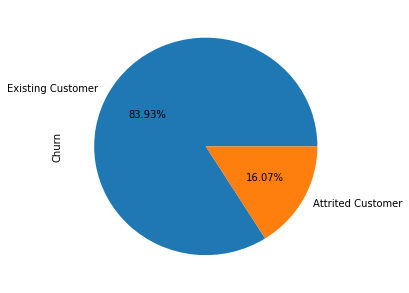

In [10]:
#data is imbalanced
df['Churn'].value_counts().plot(kind='pie', figsize= (5,5),autopct='%1.2f%%');

In [11]:
#replacing Attrition_Flag (the label/target) with 0 (for Existing Customer) and 1 (for Attrited Customer)
df['Churn'] = df['Churn'].replace({'Attrited Customer':1, 'Existing Customer':0})

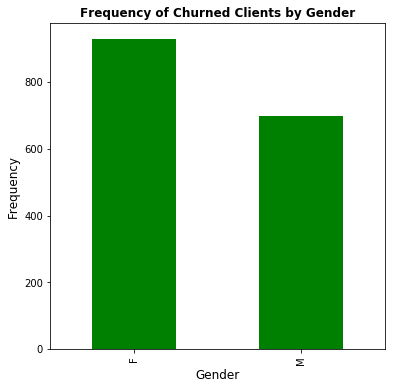

In [12]:
plt.pyplot.figure(figsize=(6,6))
df[df['Churn'] == 1]['Gender'].value_counts().plot(kind='bar', color='g')
plt.pyplot.title('Frequency of Churned Clients by Gender', fontweight = 'bold', fontsize='large')
plt.pyplot.xlabel('Gender', fontsize='large')
plt.pyplot.ylabel('Frequency', fontsize='large');

#### Exploring Dependent_Count vs. Churn

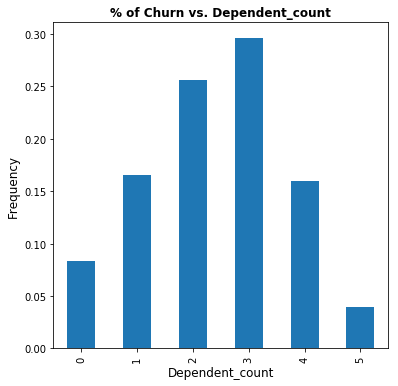

In [13]:
plt.pyplot.figure(figsize=(6,6))
df[df['Churn'] == 1]['Dependent_count'].value_counts(sort=False, normalize=True).plot(kind='bar')
plt.pyplot.title('% of Churn vs. Dependent_count', fontweight = 'bold', fontsize='large')
plt.pyplot.xlabel('Dependent_count', fontsize='large')
plt.pyplot.ylabel('Frequency', fontsize='large');

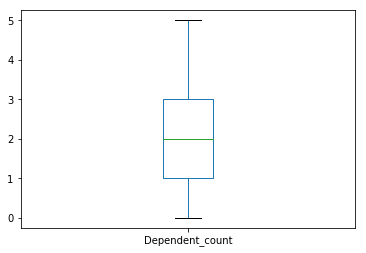

In [14]:
#examining the distribution further shows that most clients have between 1-3 dependents and therefore
#the bar chart above for dependent_count may not be as obvious of a feature to predict churn
df['Dependent_count'].plot(kind='box');

#### Exploring Number_of_Products vs. Churn

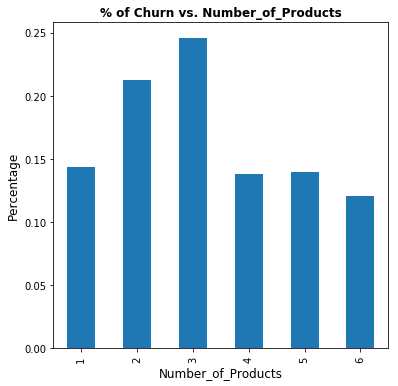

In [15]:
plt.pyplot.figure(figsize=(6,6))
df[df['Churn'] == 1]['Number_of_Products'].value_counts(sort=False, normalize=True).plot(kind='bar')
plt.pyplot.title('% of Churn vs. Number_of_Products', fontweight = 'bold', fontsize='large')
plt.pyplot.xlabel('Number_of_Products', fontsize='large')
plt.pyplot.ylabel('Percentage', fontsize='large');

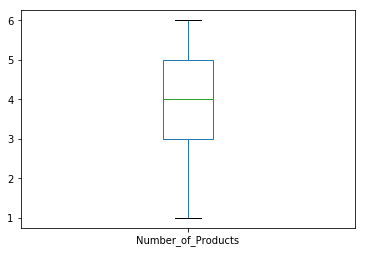

In [16]:
#most clients have between 3-5 products, but the bar chart above for churn vs. Number_of_Products shows that there is
#a significant number of customers with 1-2 products that churn.. this could be a strong predictive feature!!

df['Number_of_Products'].plot(kind='box');

#### Exploring Number_of_Products vs. Churn

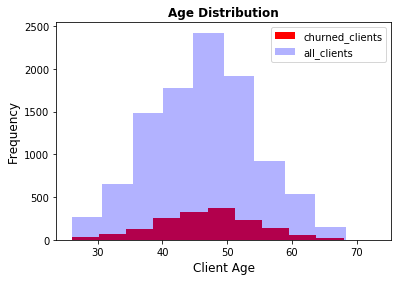

In [17]:
#distribution of age of customers that churn in red
df[df['Churn'] == 1]['Customer_Age'].plot(kind='hist', alpha=1, color= 'red') 
#distrinutio of age of all customers in blue
df['Customer_Age'].plot(kind='hist', alpha=0.3, color= 'blue') 
plt.pyplot.title('Age Distribution', fontweight = 'bold', fontsize='large')
plt.pyplot.xlabel('Client Age', fontsize='large')
plt.pyplot.ylabel('Frequency', fontsize='large')
plt.pyplot.legend(['churned_clients','all_clients']);

#there seems to be no obvious apparent relationship between age and churn according to the histogram below

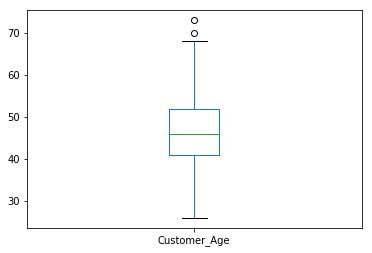

In [18]:
#only 2 outliers and there is no need for any threshod capping
df['Customer_Age'].plot(kind='box');

#### Exploring Education Level vs. Churn

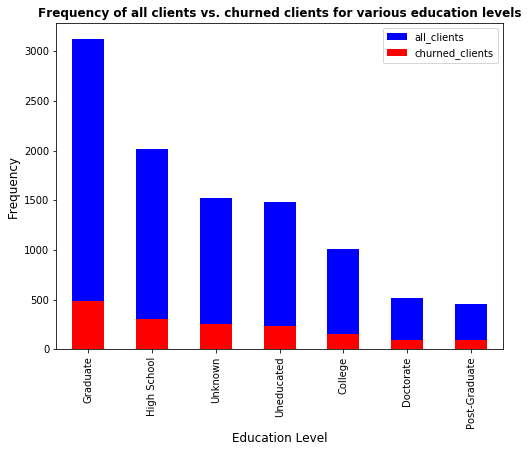

In [19]:
#there seems to be no apparent relationship between education level and customers that churn
plt.pyplot.figure(figsize=(8,6))
df['Education_Level'].value_counts().plot(kind='bar', color='b')
df[df['Churn'] == 1]['Education_Level'].value_counts().plot(kind='bar', color='red')
plt.pyplot.title('Frequency of all clients vs. churned clients for various education levels', fontweight = 'bold', fontsize='large')
plt.pyplot.xlabel('Education Level', fontsize='large')
plt.pyplot.ylabel('Frequency', fontsize='large')
plt.pyplot.legend(['all_clients','churned_clients']);

#### Exploring Marital_Status vs. Churn

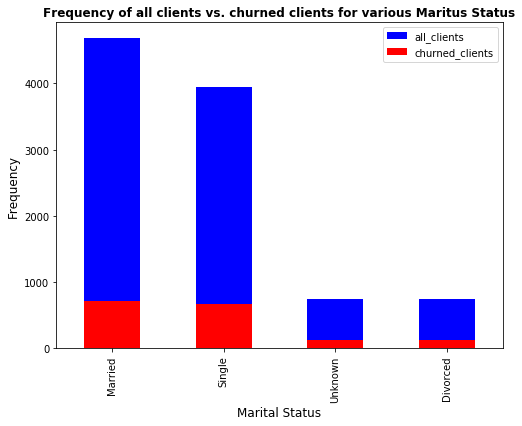

In [20]:
#Single customers churn slightly more but not a significant observation

plt.pyplot.figure(figsize=(8,6))
df['Marital_Status'].value_counts().plot(kind='bar', color='b')
df[df['Churn'] == 1]['Marital_Status'].value_counts().plot(kind='bar', color='red')
plt.pyplot.title('Frequency of all clients vs. churned clients for various Maritus Status', fontweight = 'bold', fontsize='large')
plt.pyplot.xlabel('Marital Status', fontsize='large')
plt.pyplot.ylabel('Frequency', fontsize='large')
plt.pyplot.legend(['all_clients','churned_clients']);

#### Exploring Total_Trans_Ct vs. Churn

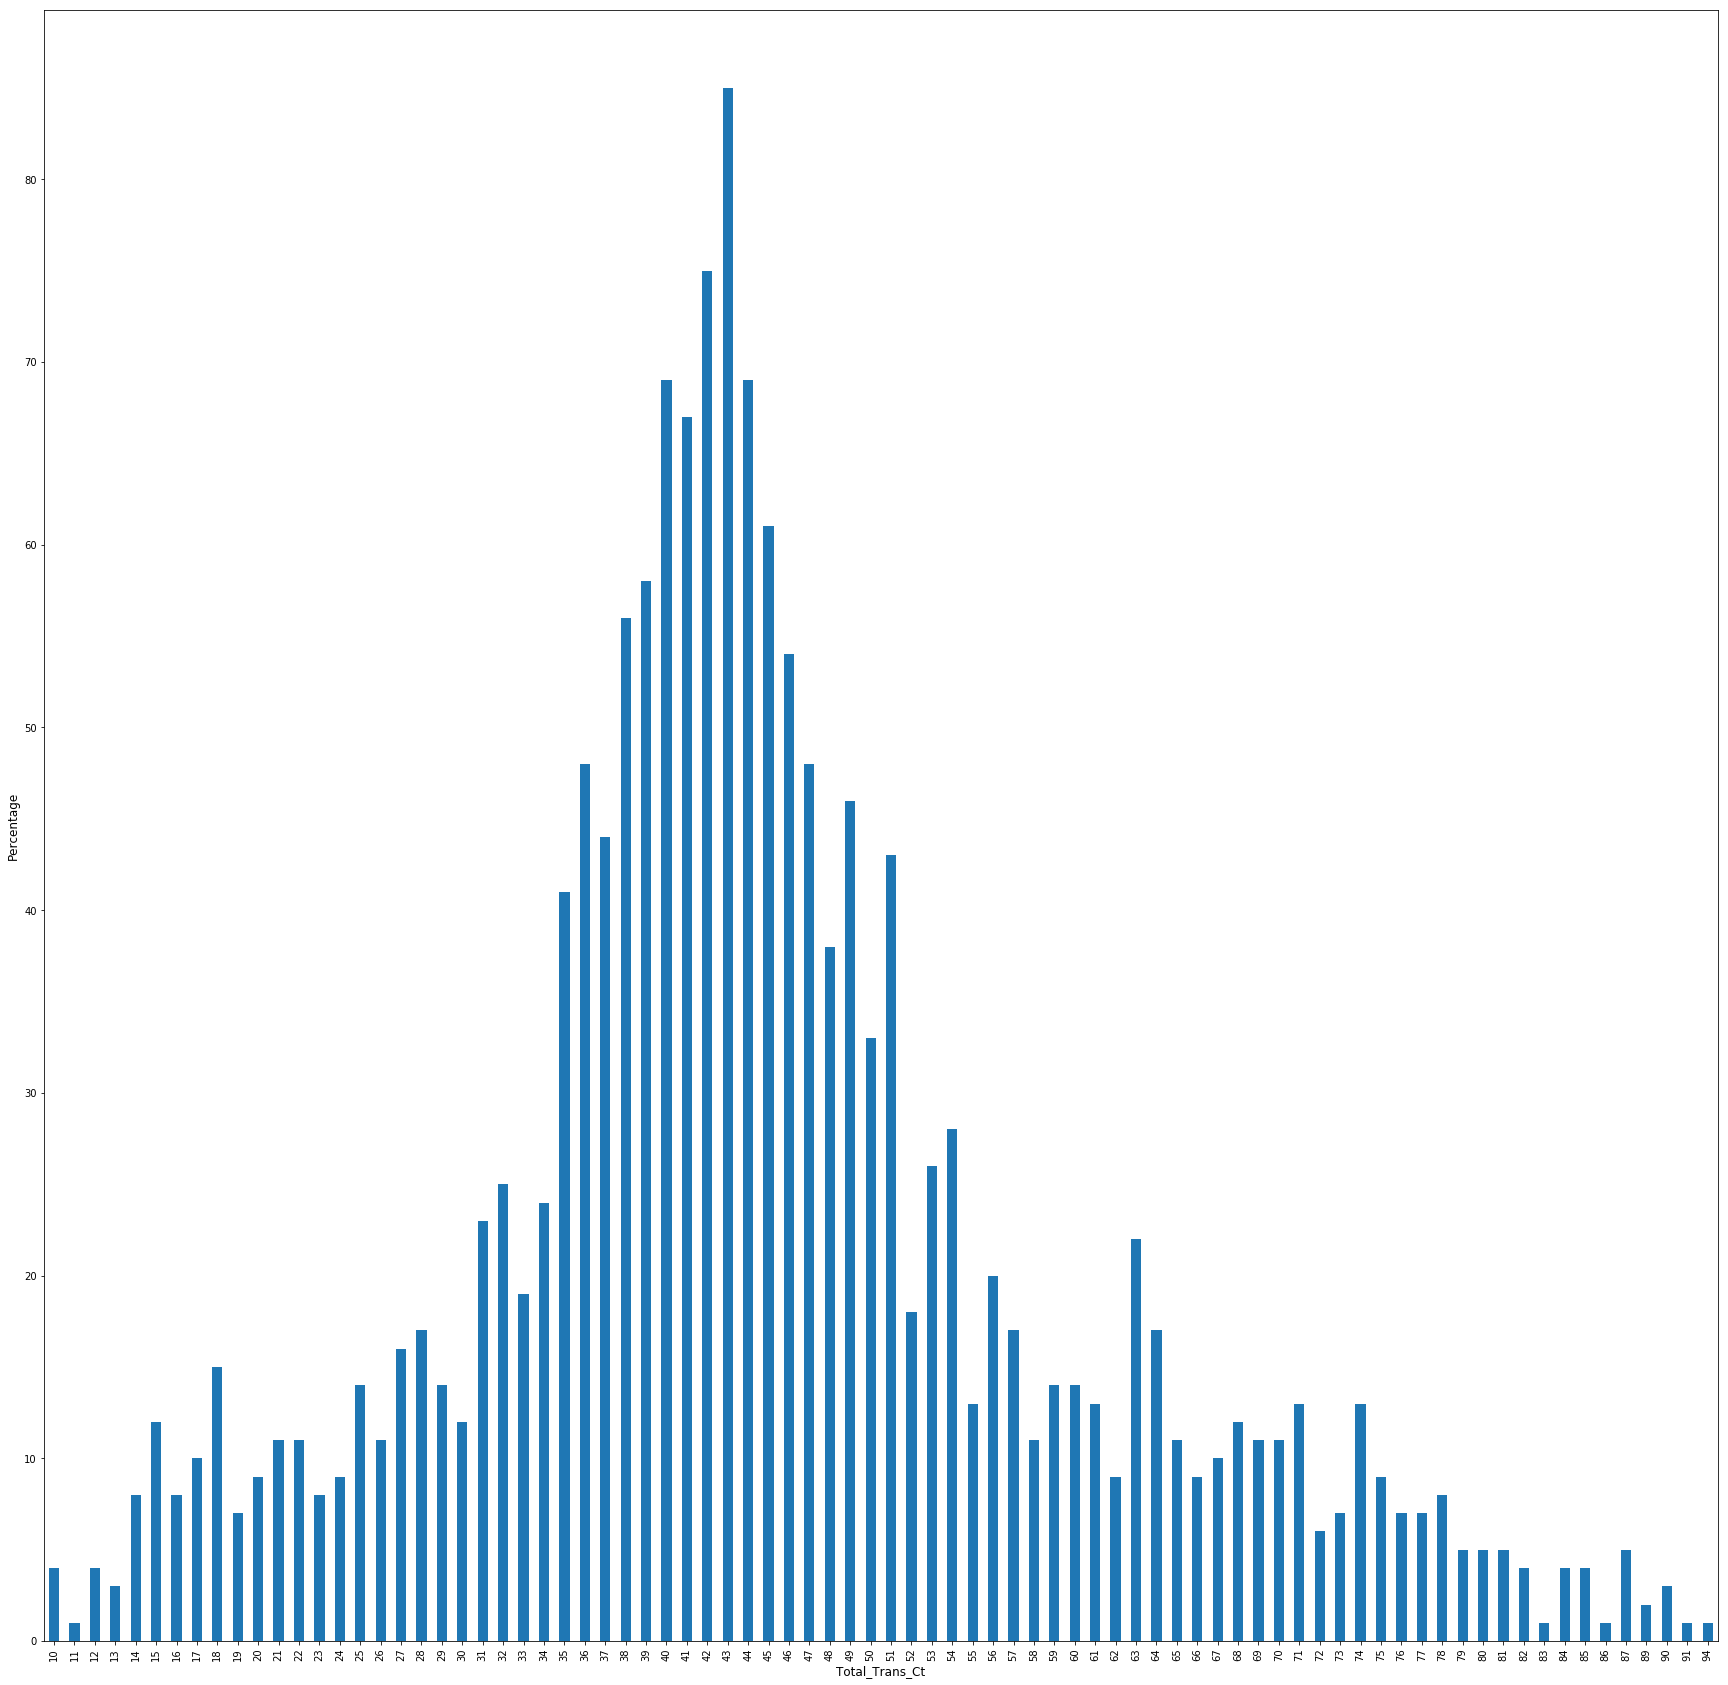

In [21]:
#A significant number of churners total transaction counts between 36 and 51.
#The box plots below will show how this is a potentially important feature
plt.pyplot.figure(figsize=(30,30))
df[df['Churn'] == 1]['Total_Trans_Ct'].value_counts(sort=False).plot(kind='bar')
plt.pyplot.xlabel('Total_Trans_Ct', fontsize='large')
plt.pyplot.ylabel('Percentage', fontsize='large');

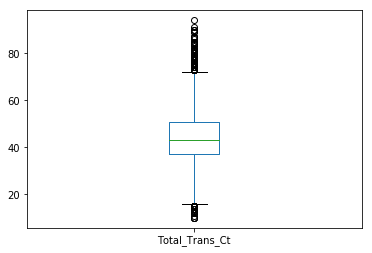

In [22]:
#distrubtion of cleints that churn and their distribution count
#you will notice that you can isolate and clearly see that there will possibly be a relationship between churn
#and transaction count based on how these 2 box plots look

df[df['Churn'] == 1]['Total_Trans_Ct'].plot(kind='box');

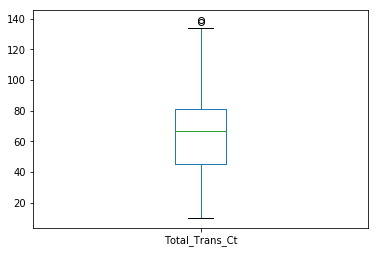

In [23]:
#distrinution of total transaction count
df['Total_Trans_Ct'].plot(kind='box');

#### Exploring Card Balance vs. Churn

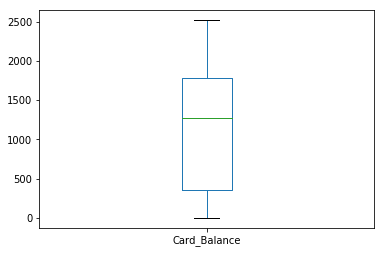

In [24]:
#distrinution of total card balance
df['Card_Balance'].plot(kind='box');

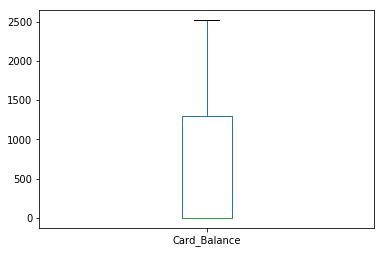

In [25]:
#relative to the overall distribution (above), a lower card balance may be a cause in having clients churn
df[df['Churn'] == 1]['Card_Balance'].plot(kind='box');

#### Exploring Months with bank vs. Churn

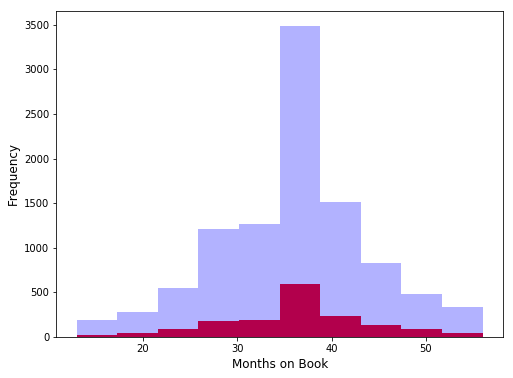

In [26]:
#distribution of period of relationship with bank
plt.pyplot.figure(figsize=(8,6))
df[df['Churn'] == 1]['Months_with_Bank'].plot(kind='hist', alpha=1, color= 'red') 
df['Months_with_Bank'].plot(kind='hist', alpha=0.3, color= 'blue')
plt.pyplot.xlabel('Months on Book', fontsize='large')
plt.pyplot.ylabel('Frequency', fontsize='large');

#there seems to be no apparent relationship between Months_on_book and churn according to the histogram below

#### Exploring Credit_Limit  vs. Churn

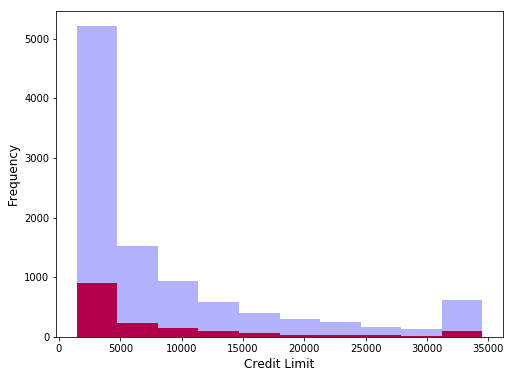

In [27]:
#distribution of credit limit for all customers (blue) and ones that did churn (red)
plt.pyplot.figure(figsize=(8,6))
df[df['Churn'] == 1]['Credit_Limit'].plot(kind='hist', alpha=1, color= 'red') 
df['Credit_Limit'].plot(kind='hist', alpha=0.3, color= 'blue')
plt.pyplot.xlabel('Credit Limit', fontsize='large')
plt.pyplot.ylabel('Frequency', fontsize='large');

#there seems to be no apparent relationship between Credit_Limit and churn according to the histogram below

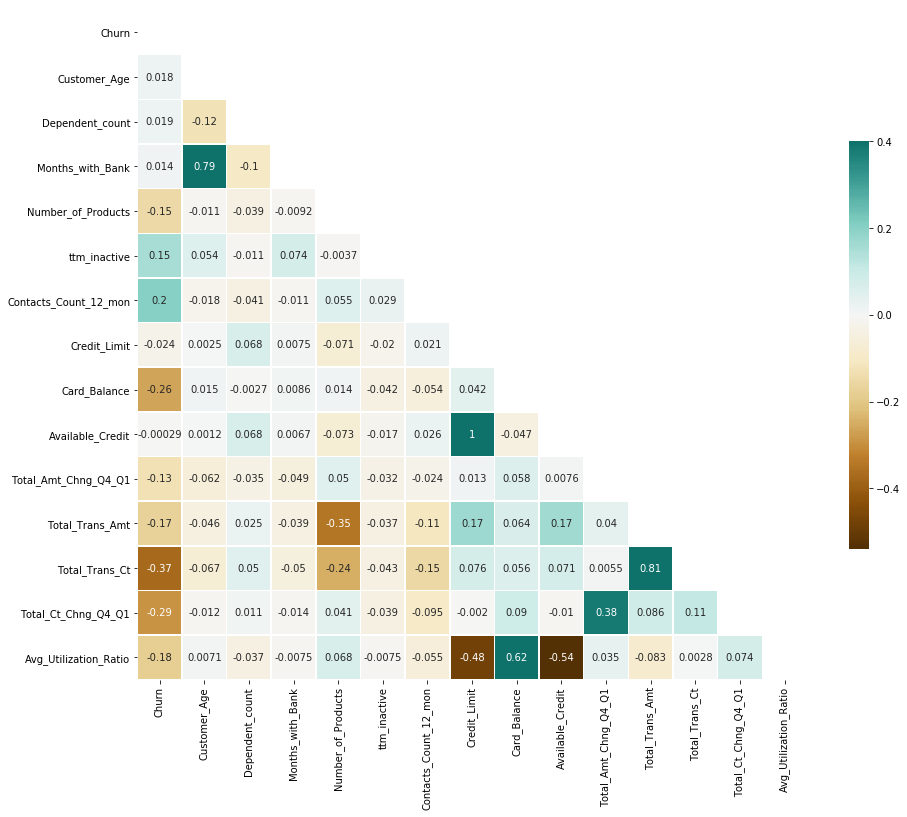

In [28]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) #mask upper triangle

f, ax = plt.pyplot.subplots(figsize=(15, 15))

cmap = 'BrBG'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, vmax=0.4, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

From the correlation matrix above, you will notice that there are a few features with strong correlations 
between them
- Months_with_Bank vs. Customer_Age (0.79)
- Available_Credit vs. Credit_Limit (1.0)
- Total_Trans_Amt vs. Total_Trans_Ct (0.81)


To decrease harmful bias, since Available_Credit and Credit_Limit have perfect correlation and pretty much
say the same thing, the Credit_Limit will be dropped


In [29]:
#dropping a Credit_Limit because it is perfectly correlated with Available_Credit
df = df.drop(['Credit_Limit'], axis = 1)

Getting a list of categorical columns to encode

In [30]:
#columns that have categorical data
categorical_columns = df.columns[df.dtypes==object].tolist()
categorical_columns

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Type']

In [31]:
#these categorical columns need to be one hot encoded
df = pd.get_dummies(df, drop_first=True)

# Baseline classification model before we add any new features

In [32]:
X = df.drop(columns='Churn')
y = df['Churn']

X.shape, y.shape

((10127, 31), (10127,))

Create a function to test different models

In [33]:
def test_model(x, y, name):
    
    # Train Test Split
    #set stratify = y because data is imbalanced 
    X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.3, random_state=1)
    
    #oversample
    smote = SMOTE(random_state = 42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    
    #feature scale on the training set
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    
    #conditions to choose the model of choice
    if name == 'logistic_regression':
        model = LogisticRegression()
        
    elif name == 'decision_tree':
        model = DecisionTreeClassifier(max_depth=5, random_state=42)
        
    elif name == 'random_forest':
        model = RandomForestClassifier(n_estimators = 100, random_state=42)
        
    elif name == 'xgboost':
        model = XGBClassifier()
    
    
    #fit the model    
    model.fit(X_train, y_train)
    
    #make predictions
    y_pred = model.predict(X_test)
    
    #classification report
    print(classification_report(y_test, y_pred))
    
    #feature importances and coefficient weights
    if name == 'logistic_regression':
        pd.Series(model.coef_[0], index=X.columns).sort_values().plot(kind='bar')
    else:
        pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='bar')
        

### Baseline Random Forest performance

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2551
           1       0.87      0.85      0.86       488

    accuracy                           0.96      3039
   macro avg       0.92      0.92      0.92      3039
weighted avg       0.96      0.96      0.96      3039



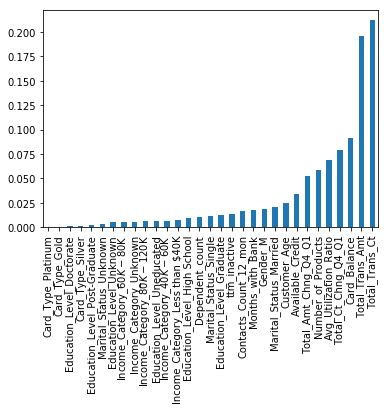

In [34]:
test_model(X,y,'random_forest')

### Baseline Decision Tree performance

              precision    recall  f1-score   support

           0       0.98      0.92      0.94      2551
           1       0.67      0.89      0.76       488

    accuracy                           0.91      3039
   macro avg       0.82      0.90      0.85      3039
weighted avg       0.93      0.91      0.92      3039



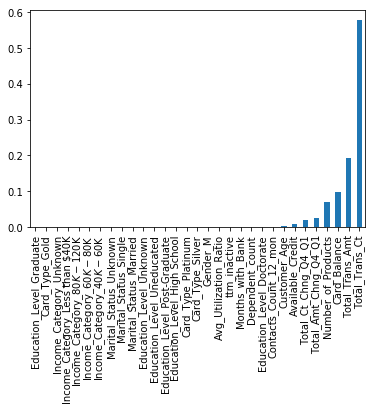

In [35]:
test_model(X,y,'decision_tree')

### Baseline Logistic Regression performance

/Users/aminsafarini/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.95      0.78      0.85      2551
           1       0.40      0.78      0.53       488

    accuracy                           0.78      3039
   macro avg       0.67      0.78      0.69      3039
weighted avg       0.86      0.78      0.80      3039



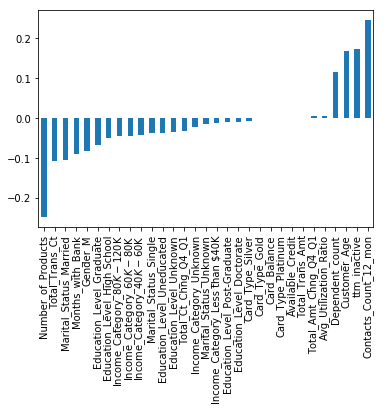

In [36]:
test_model(X,y,'logistic_regression')

### Baseline XGBoost performance

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2551
           1       0.90      0.93      0.91       488

    accuracy                           0.97      3039
   macro avg       0.94      0.95      0.95      3039
weighted avg       0.97      0.97      0.97      3039



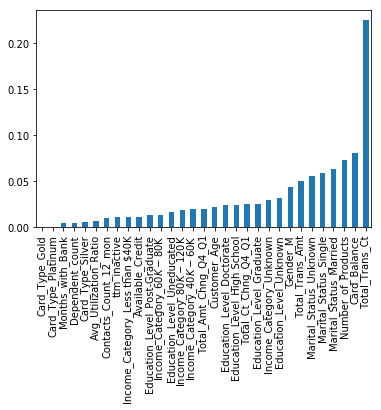

In [37]:
test_model(X,y,'xgboost')

# Feature Engineering

In [38]:
#creating some engineered features

X['FE_1'] = X['Avg_Utilization_Ratio'] * X['Total_Trans_Ct']
X['FE_2'] = X['Months_with_Bank'] / X['Number_of_Products']

#X['FE_3'] = X['Months_with_Bank'] / X['ttm_inactive'] #change -> has zeros
#X['FE_4'] = X['Avg_Utilization_Ratio'] / X['Contacts_Count_12_mon']
X['FE_5'] = X['Months_with_Bank'] / X['Customer_Age']
X['FE_6'] = X['Avg_Utilization_Ratio'] / X['Number_of_Products']

#X['FE_7'] = X['Total_Amt_Chng_Q4_Q1'] * X['Total_Ct_Chng_Q4_Q1'] -> has zeros
#X['FE_8'] = X['Contacts_Count_12_mon'] * X['Total_Ct_Chng_Q4_Q1'] -> has zeros
#X['FE_9'] = X['Dependent_count'] / X['ttm_inactive'] #change
#X['FE_10'] = X['Dependent_count'] * X['Avg_Utilization_Ratio'] -> has zeros
 
#fill in probability of target

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2551
           1       0.85      0.83      0.84       488

    accuracy                           0.95      3039
   macro avg       0.91      0.90      0.91      3039
weighted avg       0.95      0.95      0.95      3039



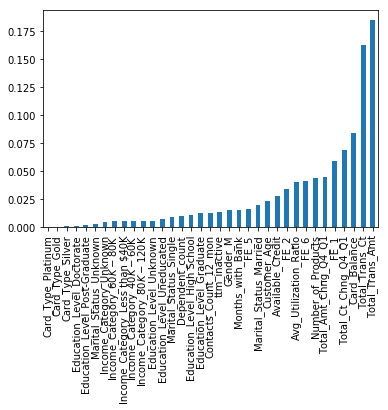

In [39]:
test_model(X,y,'random_forest')

/Users/aminsafarini/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2551
           1       0.41      0.79      0.54       488

    accuracy                           0.78      3039
   macro avg       0.68      0.79      0.70      3039
weighted avg       0.86      0.78      0.81      3039



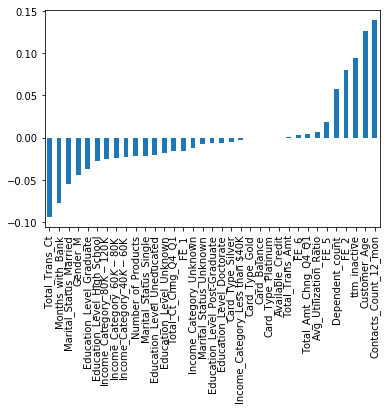

In [40]:
test_model(X,y,'logistic_regression')

# Feature Selection

In [41]:
#drop the features that initially had low correlation with the target

X = X.drop(['Customer_Age','Dependent_count','Months_with_Bank','Available_Credit'], axis = 1)


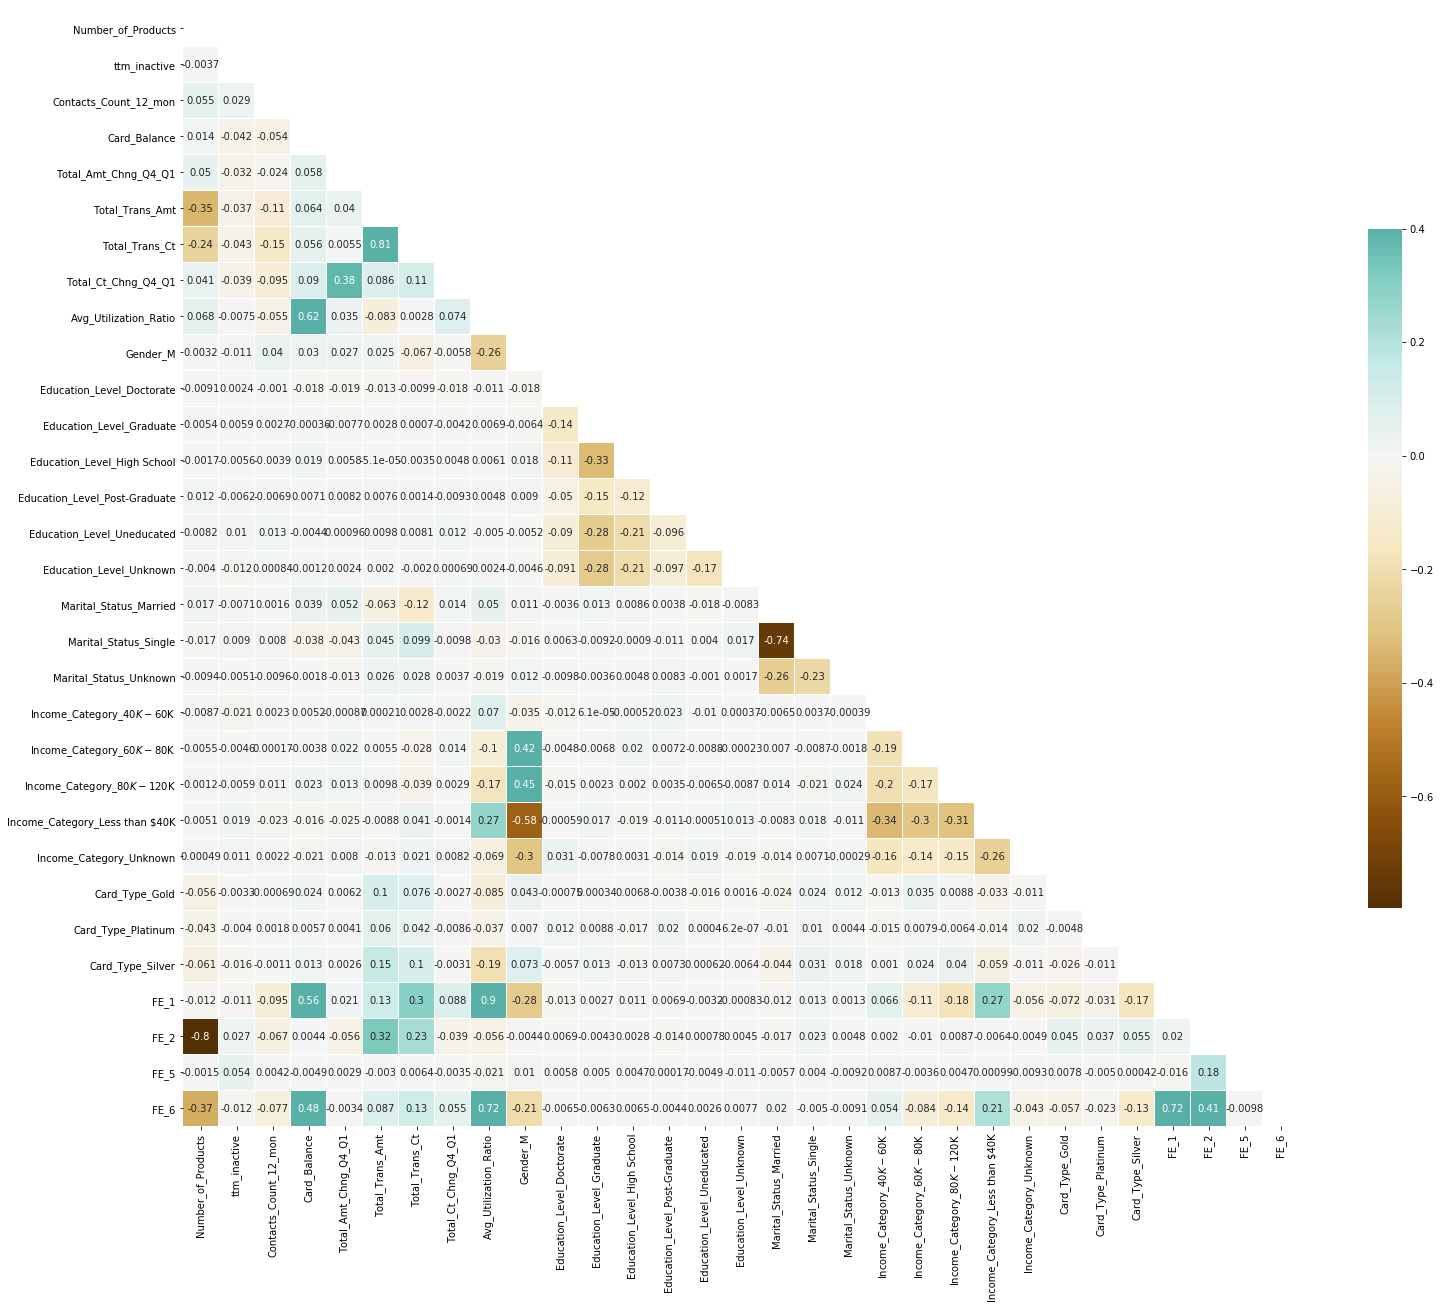

In [42]:
corr = X.corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) #mask upper triangle

f, ax = plt.pyplot.subplots(figsize=(25, 25))

cmap = 'BrBG'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, vmax=0.4, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [43]:
#drop features with the lowest feature importance from random forest

X = X.drop(columns=['Card_Type_Platinum','Card_Type_Gold','Education_Level_Doctorate','Card_Type_Silver',
       'Education_Level_Post-Graduate', 'Marital_Status_Unknown', 'FE_5', 
        'Income_Category_Less than $40K', 'Income_Category_Unknown', 'Income_Category_$60K - $80K',
        'Income_Category_$40K - $60K', 'Income_Category_$80K - $120K', 'Education_Level_Uneducated',
        'Education_Level_Unknown', 'Education_Level_High School', 'ttm_inactive'])



              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2551
           1       0.84      0.87      0.85       488

    accuracy                           0.95      3039
   macro avg       0.91      0.92      0.91      3039
weighted avg       0.95      0.95      0.95      3039



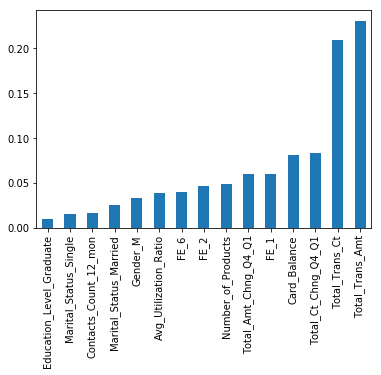

In [44]:
test_model(X,y,'random_forest')

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2551
           1       0.88      0.92      0.90       488

    accuracy                           0.97      3039
   macro avg       0.93      0.95      0.94      3039
weighted avg       0.97      0.97      0.97      3039



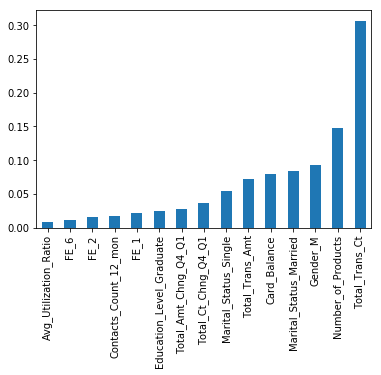

In [45]:
#the scores seem to have dropped across the board after feature engineering...
#they did better before FE

test_model(X,y,'xgboost')

### Seems like XGBoost is giving the best outcome and this is the one we will use


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=1)

#oversample
smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

#feature scale on the training set
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#instatiate model
model = XGBClassifier()

#fit the model    
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)


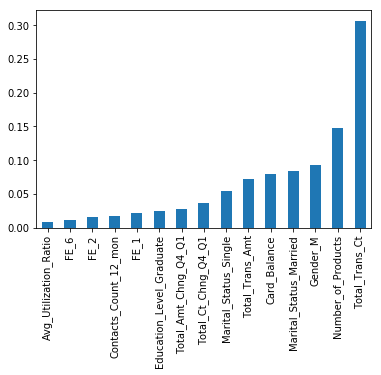

In [47]:
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='bar')

In [48]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2551
           1       0.88      0.92      0.90       488

    accuracy                           0.97      3039
   macro avg       0.93      0.95      0.94      3039
weighted avg       0.97      0.97      0.97      3039



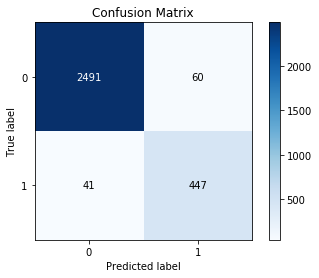

In [49]:
#confusion heat matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# Testing Featuetools package for automated feature creation 

In [50]:
#need to create an index or unique ID column for the featuretools
X['index'] = X.index

In [51]:
# creating and entity set 'es'
es = ft.EntitySet(id = 'my_table')

# adding a dataframe 
es.entity_from_dataframe(entity_id = 'clients', dataframe = X, index = 'index') #dataframe should be X_train

Entityset: my_table
  Entities:
    clients [Rows: 10127, Columns: 16]
  Relationships:
    No relationships

In [52]:
es['clients'].variables

[<Variable: index (dtype = index)>,
 <Variable: Number_of_Products (dtype = numeric)>,
 <Variable: Contacts_Count_12_mon (dtype = numeric)>,
 <Variable: Card_Balance (dtype = numeric)>,
 <Variable: Total_Amt_Chng_Q4_Q1 (dtype = numeric)>,
 <Variable: Total_Trans_Amt (dtype = numeric)>,
 <Variable: Total_Trans_Ct (dtype = numeric)>,
 <Variable: Total_Ct_Chng_Q4_Q1 (dtype = numeric)>,
 <Variable: Avg_Utilization_Ratio (dtype = numeric)>,
 <Variable: Gender_M (dtype = numeric)>,
 <Variable: Education_Level_Graduate (dtype = numeric)>,
 <Variable: Marital_Status_Married (dtype = numeric)>,
 <Variable: Marital_Status_Single (dtype = numeric)>,
 <Variable: FE_1 (dtype = numeric)>,
 <Variable: FE_2 (dtype = numeric)>,
 <Variable: FE_6 (dtype = numeric)>]

In [53]:
feature_matrix, feature_names = ft.dfs(entityset=es, 
    target_entity = 'clients', 
    max_depth = 3, #how deep to go in stacking depth
    verbose = 3, 
    n_jobs = 1)

Built 15 features
Elapsed: 00:00 | Progress: 100%|██████████


In [54]:
feature_matrix.head()

,Number_of_Products,Contacts_Count_12_mon,Card_Balance,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Graduate,Marital_Status_Married,Marital_Status_Single,FE_1,FE_2,FE_6
index,,,,,,,,,,,,,,,
0,5,3,777,1.335,1144,42,1.625,0.061,1,0,1,0,2.562,7.800000,0.012200
1,6,2,864,1.541,1291,33,3.714,0.105,0,1,0,1,3.465,7.333333,0.017500
2,4,0,0,2.594,1887,20,2.333,0.000,1,1,1,0,0.000,9.000000,0.000000
3,3,1,2517,1.405,1171,20,2.333,0.760,0,0,0,0,15.200,11.333333,0.253333
4,5,0,0,2.175,816,28,2.500,0.000,1,0,1,0,0.000,4.200000,0.000000


In [55]:
es = es.normalize_entity(base_entity_id='clients', new_entity_id='Total_Trans_Amt', index='Total_Trans_Amt')

In [56]:
feature_matrix, feature_names = ft.dfs(entityset=es, 
    target_entity = 'clients', 
    max_depth = 2, 
    verbose = 3, 
    n_jobs = 1)

Built 100 features
Elapsed: 00:13 | Progress: 100%|██████████


In [57]:
X=feature_matrix.copy() # save the generated features back into our X_Train (XX)
feature_matrix.head()

,Number_of_Products,Contacts_Count_12_mon,Card_Balance,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Graduate,...,Total_Trans_Amt.SUM(clients.FE_1),Total_Trans_Amt.SUM(clients.FE_2),Total_Trans_Amt.SUM(clients.FE_6),Total_Trans_Amt.SUM(clients.Gender_M),Total_Trans_Amt.SUM(clients.Marital_Status_Married),Total_Trans_Amt.SUM(clients.Marital_Status_Single),Total_Trans_Amt.SUM(clients.Number_of_Products),Total_Trans_Amt.SUM(clients.Total_Amt_Chng_Q4_Q1),Total_Trans_Amt.SUM(clients.Total_Ct_Chng_Q4_Q1),Total_Trans_Amt.SUM(clients.Total_Trans_Ct)
index,,,,,,,,,,,,,,,,,,,,,
0,5,3,777,1.335,1144,42,1.625,0.061,1,0,...,8.326,21.800000,0.099533,1,2,0,8,1.922,2.625,64
1,6,2,864,1.541,1291,33,3.714,0.105,0,1,...,39.282,31.533333,0.275867,2,3,1,23,3.349,5.528,108
2,4,0,0,2.594,1887,20,2.333,0.000,1,1,...,49.256,59.333333,0.146000,3,3,1,17,4.541,4.086,148
3,3,1,2517,1.405,1171,20,2.333,0.760,0,0,...,15.200,11.333333,0.253333,0,0,0,3,1.405,2.333,20
4,5,0,0,2.175,816,28,2.500,0.000,1,0,...,0.000,4.200000,0.000000,1,1,0,5,2.175,2.500,28


In [58]:
#will look into this later... need to clean nan's etc. from the new featured columns and fit into a new model...

test_model(X,y,'random_forest')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').